In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv('food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


## Data normalize

In [4]:
X = df.iloc[:, 1:].values

In [5]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [7]:
X.mean(axis=0)

array([-9.45745539e-17,  0.00000000e+00,  6.57909941e-17,  3.70074342e-17,
        1.38777878e-16])

In [9]:
X.std(axis=0)

array([1., 1., 1., 1., 1.])

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [12]:
Z = linkage(X, method='average', metric='euclidean')

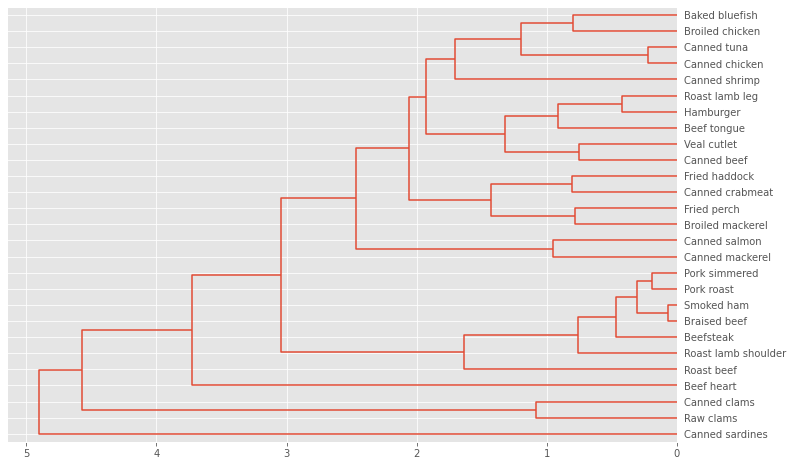

In [16]:
dend = dendrogram(Z, orientation='left', color_threshold=0.0, labels=df.Name.values)

In [17]:
label = fcluster(Z, 2.2, criterion='distance')

In [18]:
np.unique(label)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [19]:
df.loc[:, 'label'] = label

In [21]:
for i, group in df.groupby('label'):
    print('=' * 10)
    print(f'cluster {i}')
    print(group)

cluster 1
            Name  Energy  Protein  Fat  Calcium  Iron  label
16     Raw clams      70       11    1       82   6.0      1
17  Canned clams      45        7    1       74   5.4      1
cluster 2
                   Name  Energy  Protein  Fat  Calcium  Iron  label
0          Braised beef     340       20   28        9   2.6      2
2            Roast beef     420       15   39        7   2.0      2
3             Beefsteak     375       19   32        9   2.6      2
9   Roast lamb shoulder     300       18   25        9   2.3      2
10           Smoked ham     340       20   28        9   2.5      2
11           Pork roast     340       19   29        9   2.5      2
12        Pork simmered     355       19   30        9   2.4      2
cluster 3
               Name  Energy  Protein  Fat  Calcium  Iron  label
21  Canned mackerel     155       16    9      157   1.8      3
23    Canned salmon     120       17    5      159   0.7      3
cluster 4
                Name  Energy  Protein  Fa